=== FX Data Summary ===
Collection Date: 2025-05-23 19:33:36
Pairs Collected: 7
Data Source: IBKR

=== Current Exchange Rates ===
EURUSD: 1.1368
CNHUSD: 0.1394
JPYUSD: 0.0070
CADUSD: 0.7285
MXNUSD: 0.0520
GBPUSD: 1.3541
SGDUSD: 0.7779

=== Volatility Summary ===
        average  current     min     max
EURUSD   0.0682   0.0988  0.0373  0.1344
CNHUSD   0.0421   0.0439  0.0152  0.0680
JPYUSD   0.0964   0.1361  0.0473  0.1669
CADUSD   0.0523   0.0566  0.0298  0.0815
MXNUSD   0.1200   0.0820  0.0512  0.2048
GBPUSD   0.0695   0.0831  0.0358  0.1103
SGDUSD   0.0459   0.0698  0.0266  0.0871


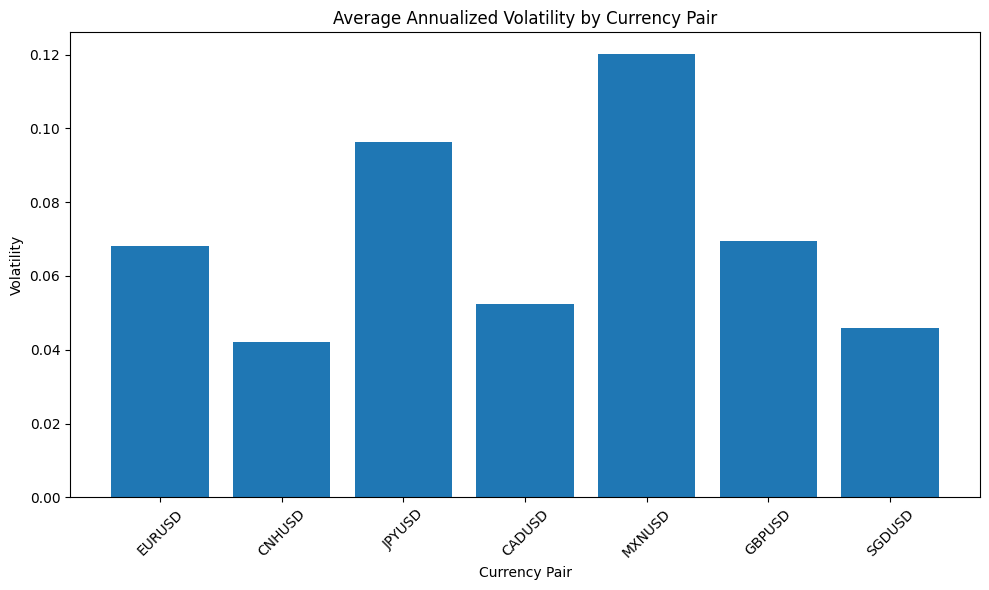

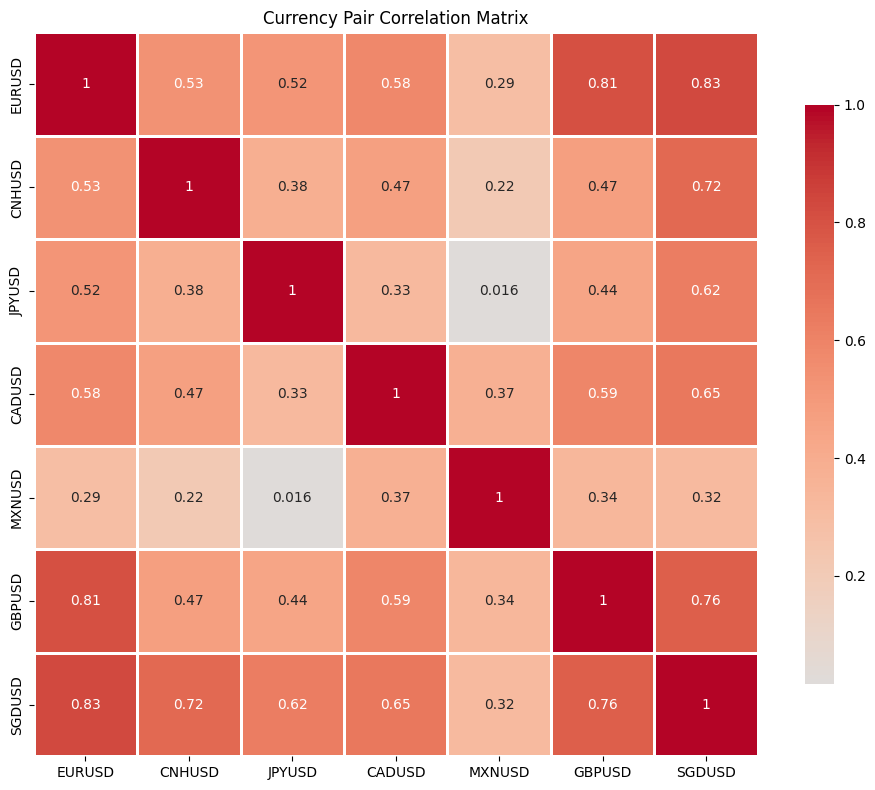

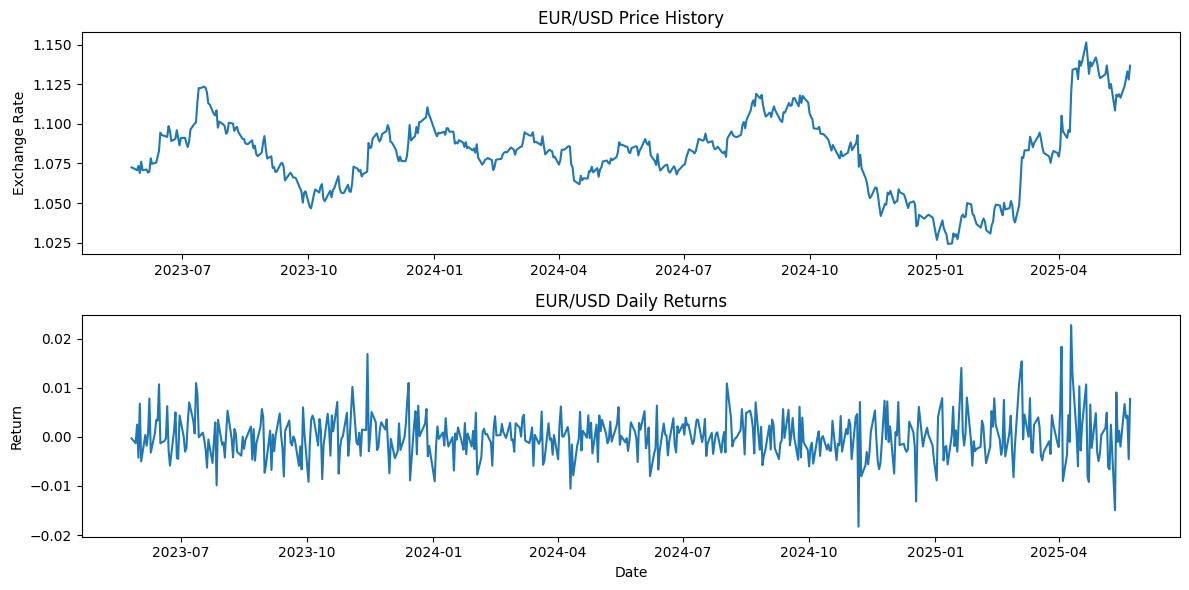


=== FX Summary Table ===
     pair      rate  volatility
0  EURUSD  1.136790    0.068220
1  CNHUSD  0.139435    0.042144
2  JPYUSD  0.007015    0.096373
3  CADUSD  0.728481    0.052344
4  MXNUSD  0.051979    0.120047
5  GBPUSD  1.354075    0.069483
6  SGDUSD  0.777913    0.045904


In [13]:
# Cell 1: Load the collected data
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set data directory
PROJECT_ROOT = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
data_dir = os.path.join(PROJECT_ROOT, "data", "historical")

# Load the parameters file
params_file = os.path.join(data_dir, 'fx_model_parameters.json')
with open(params_file, 'r') as f:
    fx_data = json.load(f)

print("=== FX Data Summary ===")
print(f"Collection Date: {fx_data['metadata']['collection_date']}")
print(f"Pairs Collected: {fx_data['metadata']['pairs_collected']}")
print(f"Data Source: {fx_data['metadata']['data_source']}")

# Cell 2: Display current rates
print("\n=== Current Exchange Rates ===")
for pair, rate in fx_data['current_rates'].items():
    print(f"{pair}: {rate:.4f}")

# Cell 3: Display volatilities
print("\n=== Volatility Summary ===")
vol_df = pd.DataFrame(fx_data['volatilities']).T
print(vol_df.round(4))

# Cell 4: Visualize volatilities
plt.figure(figsize=(10, 6))
pairs = list(fx_data['volatilities'].keys())
avg_vols = [fx_data['volatilities'][p]['average'] for p in pairs]

plt.bar(pairs, avg_vols)
plt.title('Average Annualized Volatility by Currency Pair')
plt.xlabel('Currency Pair')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cell 5: Load and visualize correlation matrix
corr_df = pd.DataFrame(fx_data['correlations'])
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": .8})
plt.title('Currency Pair Correlation Matrix')
plt.tight_layout()
plt.show()

# Cell 6: Load raw data for deeper analysis (example with EURUSD)
try:
    eurusd_path = os.path.join(data_dir, 'fx_data_EURUSD.csv')
    eurusd_df = pd.read_csv(eurusd_path, index_col='date', parse_dates=True)
    
    # Plot price history
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(eurusd_df.index, eurusd_df['close'])
    plt.title('EUR/USD Price History')
    plt.ylabel('Exchange Rate')
    
    # Plot returns
    plt.subplot(2, 1, 2)
    returns = eurusd_df['close'].pct_change()
    plt.plot(eurusd_df.index, returns)
    plt.title('EUR/USD Daily Returns')
    plt.ylabel('Return')
    plt.xlabel('Date')
    
    plt.tight_layout()
    plt.show()
    
    # Also load and display the summary
    summary_path = os.path.join(data_dir, 'fx_summary.csv')
    summary_df = pd.read_csv(summary_path)
    print("\n=== FX Summary Table ===")
    print(summary_df)
    
except FileNotFoundError:
    print("Run ibkr_data_collector.py first to generate the data files")